In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
#mnist is the in built dataset thand contains hand written images of number 0 to 9 with 60k numbers
from tensorflow.keras.datasets import mnist
(x_train,_),(x_test,_)=mnist.load_data()
#normailizing
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

In [ ]:
#define autoencoder architectiure ,input layer
latent_dim=64
input_img=Input(shape=(x_train.shape[1],))

In [ ]:
encoded=Dense(128,activation='relu')(input_img)
encoded=Dense(latent_dim,activation='relu')(encoded)

In [ ]:
decoded=Dense(128,activation='relu')(encoded)
decoded=Dense(x_train.shape[1],activation='sigmoid')(decoded)

In [ ]:
#autoencoder model
autoencoder=Model(input_img,decoded)
#encoder model
encoder=Model(input_img,encoded)

In [ ]:
#compile the encoder
autoencoder.compile(optimizer='adam',loss=MeanSquaredError())
#train the autoencoder
autoencoder.fit(x_train,x_train,epochs=20,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0911 - val_loss: 0.0318
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0280 - val_loss: 0.0190
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0181 - val_loss: 0.0144
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0142 - val_loss: 0.0121
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0121 - val_loss: 0.0109
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0110 - val_loss: 0.0098
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


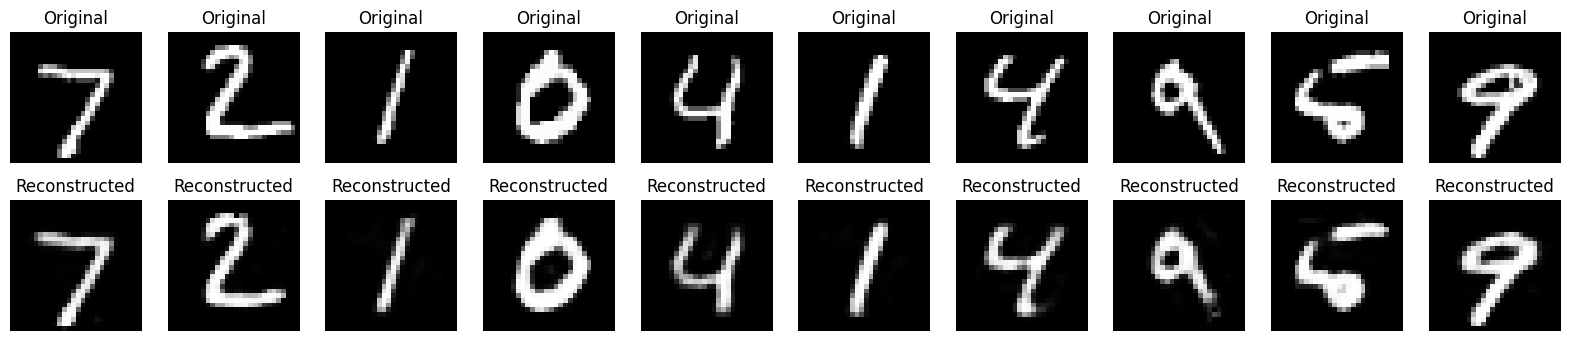

In [ ]:
# **5. Visualize Reconstruction**
import matplotlib.pyplot as plt

# Encode and decode test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()